<p><b>Question #1</b>: 
<ol>
    <li>Download the heart.csv dataset from the Canvas and use <b>read_csv( )</b> to read it.</li>
    <li>Creat a new column named <b>'age_cat'</b> in the DataFrame to present individuals' age with 4 categories. Here is the list of categories:
        <ul>
            <li>25-40</li>
            <li>40-55</li>
            <li>55-70</li>
            <li>70+</li>
        </ul>
    </li>
    <li>Creat a pie chart to show the percentage of individuals in each age category.
        <ul>
            <li>Use the <u>Explode</u> feature of pie chart in matplotlib to separate the age category of 40-55.</li>
        </ul>
    </li>
    <li>Creat a histogram with with 20 bins and white edgecolor to visualize the distribution of <b>"chol"</b> feature. Then use the annotation function to point to the bin with the highest value.</li>
    <li>Use <u>logistic regression</u> to create a predictive model
        <ul>
            <li>Use 70% of data for tarining and consider 30% of data for testing. (Use <b style="color:red">random_state=0</b>)</li>
            <li>Use all features (13 features in the orignal dataset, you don't need to use age_cat) to creat your predictive model</li>
            <li><b>traget</b> is your dependent variable. It shows whether the subject suffers form a heart disease or not.</li>
        </ul>
    </li>
    <li>Use similar structure as above to create a <u>naive bayes</u> predictive model.</li>
    <li>Use in-sample data (train data) and out-of-sample data (test data) to check the accuracy of your naive bayes model:
        <ul>
            <li>What is the general expectation? should we expect to get higher accuray on in-sample data or out-of-sample data</li>
            <li>What is the result in your case?</li>
        </ul>
    </li>
    <li>Find precision, recall and F1 scores for both logistic regression and naive bayes models using out-of-sample data (test data) and explain which one works better than the other?</li>
</ol>
</p>

In [1]:
#import the required libraries
import pandas as pd
import numpy as np

In [2]:
# Write your answer here (part1)
data = pd.read_csv("J:/Data Science/Assignment-2/heart.csv")  #read heart.csv 
data.head()                   

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Write your answer here (part2)
#insert a new colunm with the rages of age
data["age_cat"] = pd.cut(data.age, (25, 40, 55, 70, 100), labels = ('25-40', '40-55', '55-70', '70+'))
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_cat
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,55-70
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,25-40
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,40-55
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,55-70
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,55-70


In [4]:
#import matplotlin.pyplot
from matplotlib import pyplot as plt

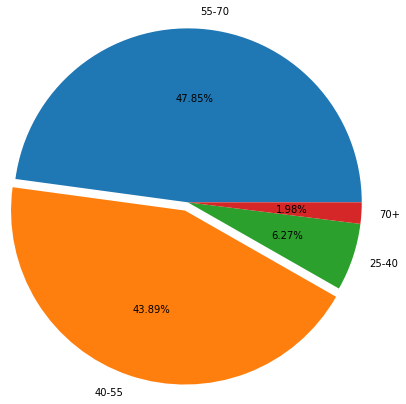

In [6]:
# Write your answer here (part3)
#pie plot with the rages of age
values = data.age_cat.value_counts()
plt.pie(values, labels=('55-70', '40-55', '25-40', '70+'), explode = (0, 0.1, 0, 0), autopct = '%.2f%%', radius=2)
plt.show()

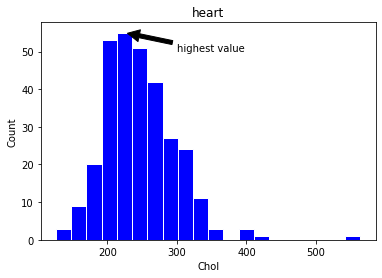

In [7]:
# Write your answer here (part4)
#histogram with 20 bins
plt.hist(data.chol, bins=20, color='blue', edgecolor='white')
plt.title("heart")
plt.xlabel("Chol")
plt.ylabel("Count")
plt.annotate('highest value', xy = (225, 55), xytext=(300, 50),arrowprops = dict(facecolor='black', shrink = 0.05))
plt.show()

In [10]:
#import sklearn for machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [12]:
# Write your answer here (part5)
#read independent and dependent variables
X = data.iloc[:,:13] 
y = data.iloc[:,13]
model = LogisticRegression(solver= 'newton-cg')
#divide data into 70% for training and 30% for testing
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#fit the model using logistic regression
model.fit(X_train, y_train)
print("Model Coef", model.coef_)
print("Model Intercept", model.intercept_)
y_test_hat = model.predict(X_test)
accuracy_score(y_test,y_test_hat) * 100

Model Coef [[ 0.01329036 -1.59325734  0.74295007 -0.01175775 -0.00508972 -0.54221284
   0.18565455  0.02411308 -0.78693811 -0.70454873  0.22181673 -0.79466031
  -0.76142423]]
Model Intercept [1.96921483]


81.31868131868131

In [16]:
# Write your answer here (part6)
from sklearn.naive_bayes import GaussianNB
#import Gaussian model and fit the data for classification
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pre_test = gnb.predict(X_test)
y_pre_train = gnb.predict(X_train)

In [17]:
# Write your answer here (part7)
print('Accuracy of test data', accuracy_score(y_test,y_pre_test) * 100)
print('Accuracy of train data', accuracy_score(y_train,y_pre_train) * 100)

Accuracy of test data 80.21978021978022
Accuracy of train data 84.43396226415094


<p> Accuracy of test data is 80.219% <br>
Accuracy should not be too high or too low which lands up to overfit or underfit issues respectively. So, it is beter taking help of precision and recall to judge a machine learning model<p>

In [19]:
# Write your answer here (part8)
from sklearn.metrics import classification_report, confusion_matrix
print('         **********Logistic Regression***********           ')
print(classification_report(y_test,y_test_hat))
print('         **********Naive Bayes***********                   ')
print(classification_report(y_test,y_pre))

         **********Logistic Regression***********           
              precision    recall  f1-score   support

           0       0.86      0.73      0.79        44
           1       0.78      0.89      0.83        47

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91

         **********Naive Bayes***********                   
              precision    recall  f1-score   support

           0       0.84      0.73      0.78        44
           1       0.77      0.87      0.82        47

    accuracy                           0.80        91
   macro avg       0.81      0.80      0.80        91
weighted avg       0.81      0.80      0.80        91



<p>As the data is regarding the heart issues, the number of False Negatives should be low in order to save the patient. So, Recall for the target = 1 should be high. The Logistic Regression model provides high Recall and high precision values which make the model to be selected for classifying this dataset.<p>

<p><b>Question #2</b>: 
<ol>
    <li>Download the Graduate_Admissions.csv dataset from the Canvas and use <b>read_csv( )</b> to read it.</li>
    <li>Remove the Serial_No column from the dataset.</li>
    <li>Create a scatter plot with <u>SOP</u> and <u>CGPA</u> features and color that using the <u>Research</u> feature
    <ul>
        <li>Put appropriate title, axis labels and legend for your visualization.</li>
    </ul>
    </li> 
    <li>Use linear regression to creat a predictive model.
    <ul>
        <li>Use 70% of data for tarining and consider 30% of data for testing. (Use <b style="color:red">random_state=0</b>)</li>
        <li>Use all features (7 features) to create you predictive model.</li>
        <li><b>Chance _of_Admit</b> is your dependent variable.</li> 
    </ul>
    </li>
    <li> Compute $R^2$ for both in-sample(train data) and out-of-sample (test data) data. Which one is higher? What was your expectation?</li> 
    <li> Compute MSE for both in-sample (train data) and out-of-sample (test data) data. Which one is higher? What was your expectation?</li> 
    <li> Use PCA to reduce the number of features (7 independent features) into <u>two</u> components.</li>
    <li> Create a new linear regression predictive model using two PCA components. 
    <ul>
        <li>Use 70% of data for tarining and consider 30% of data for testing. (Use <b style="color:red">random_state=0</b>)</li>
        <li>Use two PCA components as independent variables to create you predictive model.</li>
        <li><b>Chance _of_Admit</b> is your dependent variable</li> 
    </ul>
    </li>
    <li> Compute MSE and $R^2$ for the out-of-sample data using second predictive model.</li> 
</ol>

<b>Data Source:</b> Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019
</p>

In [21]:
# Write your answer here (part1)
#read graduate adimmisions data
data2 = pd.read_csv("J:/Data Science/Assignment-2/Graduate_Admissions.csv")
data2.head()

,Serial_No,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance _of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [22]:
# Write your answer here (part2)
#delete the Serial_No column
data2 = data2.drop('Serial_No', axis = 1)
data2.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance _of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


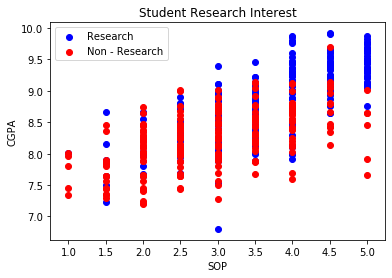

In [41]:
# Write your answer here (part3)
filter_1 = (data2['Research'] == 1)
filter_0 = (data2['Research'] == 0)
#scatter plot between SOP and CGPA
plt.scatter(data2['SOP'][filter_1], data2['CGPA'][filter_1], c = 'Blue', label ='Research')
plt.scatter(data2['SOP'][filter_0], data2['CGPA'][filter_0], c = 'Red', label ='Non - Research')
plt.title("Student Research Interest")
plt.xlabel("SOP")
plt.ylabel("CGPA")
plt.legend()
plt.show()

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
# Write your answer here (part4)
X = data2.iloc[:,:7]
y = data2.iloc[:,7]
#define a linearregression model
model = LinearRegression(fit_intercept = True)
#partition the train and test then fit the train data to the model
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model.fit(X_train, y_train)
print("Model Coef", model.coef_)
print("Model Intercept", model.intercept_)
y_test_hat = model.predict(X_test)

Model Coef [ 0.00215477  0.00248846  0.00616647 -0.00062828  0.01974312  0.11868894
  0.02085281]
Model Intercept -1.3439827275588012


In [44]:
# Write your answer here (part5)
# R2 for training set
print('R2 for training set',model.score(X_train, y_train))
# R2 for testing set
print('R2 for testing set',model.score(X_test, y_test))

R2 for training set 0.8317861130579625
R2 for testing set 0.7910195074277857


<p>R2 gives the corelation between the independent and dependent variables. R2 for training dataset is <b>83.18%</b> and for testing dataset is <b>79.10%</b>. The corelation is more in training dataset and there is a possibility of getting high corelation in training data as the percentage of data is more compared to the test data. High R2 is preferable as the independent variables give more information about the traget.</p>

In [46]:
# Write your answer here (part6)
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_train_hat = model.predict(X_train)
#calculate the MSE by importing the metrics from sklearn
print('MSE for test data = ',mean_squared_error(y_test,y_test_hat))
print('MSE for train data = ',mean_squared_error(y_train,y_train_hat))

MSE for test data =  0.0038128490869800526
MSE for train data =  0.003439771582030502


<P>The mean square error tells how close a regression line is to a set of points. The smaller the MSE, the closer you are to finding the line of best fit. The MSE for test data is <b>0.0038</b> and for train data is <b>0.0034</b>. The training data gives the minimum MSE.</P>

In [47]:
# Write your answer here (part7)
from sklearn.decomposition import PCA
#Decompose the independent variables to 2 by using Priciple Component Analysis
pca_2c = PCA(n_components=2)   
projection = pca_2c.fit_transform(X)
projection.shape

(500, 2)

In [48]:
# Write your answer here (part8)
X_train, X_test, y_train,y_test = train_test_split(projection, y, test_size=0.3, random_state=0)
#Partition the decomposed data and fit to linear regression model
model.fit(X_train, y_train)
print("Model Coef", model.coef_)
print("Model Intercept", model.intercept_)
y_test_hat = model.predict(X_test)

Model Coef [-0.00944281 -0.005031  ]
Model Intercept 0.7244909418086182


In [49]:
# Write your answer here (part9)
# R2 for training set
print('R2 for train data',model.score(X_train, y_train))
# R2 for training set
print('R2 for test data', model.score(X_test, y_test))
y_train_hat = model.predict(X_train)
print('MSE for test data = ',mean_squared_error(y_test,y_test_hat))
print('MSE for train data = ',mean_squared_error(y_train,y_train_hat))

R2 for train data 0.720218523705407
R2 for test data 0.6735395933324764
MSE for test data =  0.00595627011964897
MSE for train data =  0.005721194538880707


<p><b>Question #3</b>:
<ol>
    <li>Download the Employee_Retention.csv dataset from the Canvas and use <b>read_csv( )</b> to read it.</li>
    <li>Convert <b>Sales</b> and <b>Salary</b> categorical features into dummy variables.
        <ul>
            <li>If it is necassary, delete the original Sales and Salary columns after the generation dummy variables. </li>
        </ul>
    </li>
    <li>Use mean normalization ($\frac{X-\mu}{\sigma}$) to normalize values in <b>number_project</b>, <b>average_montly_hours</b>, and <b>time_spend_company</b> columns.</li>
    <li>Use KNN to create three predictive models (1. with 2 neighbors, 2. with 5 neighbors, 3. with 7 neighbors)
    <ul>
        <li>Use 70% of data for tarining and consider 30% of data for testing. (Use <b style="color:red">random_state=0</b>)</li>
        <li>Use all the features (including dummy variables) to create you predictive model.</li>
        <li><b>left</b> is your dependent variable.</li> 
    </ul>
    </li>
    <li>Find the accuracy of your models using out-of-sample data (test data). Which model has the highest accuracy? </li>
    <li>Use KNN with 3 neighbors to create a new predictive model.
    <ul>
        <li>Use whole dataset for training.</li>
        <li>Use <b>satisfaction_level</b> and <b>last_evaluation</b> features as your independent variables.</li>
        <li><b>left</b> is your dependent variable.</li> 
    </ul>
    </li>
    <li>Visualize the decision boundary of your model.</li>
</ol>

</p> 

In [53]:
# Write your answer here (part1)
data3=pd.read_csv("J:/Data Science/Assignment-2/Employee_Retention.csv")
data3.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [54]:
# Write your answer here (part2)
#insert dummy variables for the categorical variables
data3=pd.get_dummies(data3, columns=['sales','salary'])
data3.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [56]:
# Write your answer here (part3)
#normalize the data using mean normalization
import statistics as st
def normalize(arg):
    mean = st.mean(data3[arg])
    std = st.stdev(data3[arg])
    new_data = []
    for i in range(len(data3[arg])):
        new_data.append((data3[arg][i]-mean)/std)
    return new_data

data3['number_project'] = normalize('number_project')
data3['average_montly_hours'] = normalize('average_montly_hours')
data3['time_spend_company'] = normalize('time_spend_company')

In [58]:
#Assign the independent and dependent variables to X and y to the the operations
lis = [x for x in range(0, 21) if x != 7]

X = data3.iloc[:,lis]
y = data3.iloc[:,7]

In [59]:
# Write your answer here (part4)
from sklearn.neighbors import KNeighborsClassifier
#partition the data to test and train models and fit the data to KNN
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#KNN for 2 neighbors
model_2 = KNeighborsClassifier(n_neighbors=2)
model_2.fit(X_train, y_train)
y_test_hat2 = model_2.predict(X_test)
#KNN for 5 neighbors
model_5 = KNeighborsClassifier(n_neighbors=5)
model_5.fit(X_train, y_train)
y_test_hat5 = model_5.predict(X_test)
#KNN for 7 neighbors
model_7 = KNeighborsClassifier(n_neighbors=7)
model_7.fit(X_train, y_train)
y_test_hat7 = model_7.predict(X_test)

In [60]:
# Write your answer here (part5)
#Calculate the accuracy for all the three KNN models
print("Accuracy with 2 neighbors", accuracy_score(y_test,y_test_hat2, normalize = True) * 100 )
print("Accuracy with 5 neighbors", accuracy_score(y_test,y_test_hat5, normalize = True) * 100 )
print("Accuracy with 7 neighbors", accuracy_score(y_test,y_test_hat7, normalize = True) * 100 )

Accuracy with 2 neighbors 95.39999999999999
Accuracy with 5 neighbors 94.22222222222221
Accuracy with 7 neighbors 94.17777777777778


<p>The KNN model with 2 neighbors has the high accuracy of <b>95.39%</b>. The accuracy high but there is a probability that the model includes more noise as the K-mean value is very low.</p>

In [127]:
# Write your answer here (part6)
#KNN with K-mean equal to 3
X_3 = data3.loc[:, ['satisfaction_level', 'last_evaluation']]
model_3 = KNeighborsClassifier(n_neighbors=3)
model_3.fit(X_3, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

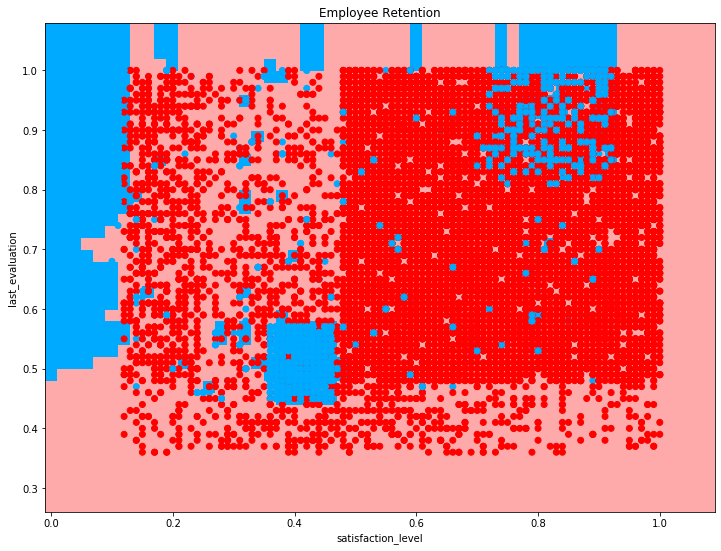

In [134]:
from matplotlib.colors import ListedColormap
# Write your answer here (part7)
h = 0.02
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])

x_min, x_max = X_3.iloc[:,0].min()-0.1, X_3.iloc[:,0].max()+0.1
y_min, y_max = X_3.iloc[:,1].min()-0.1, X_3.iloc[:,1].max()+0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# predict class using data and kNN classifier
Z = model_3.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(12,9))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_3.iloc[:,0], X_3.iloc[:,1], c=y, cmap = cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Employee Retention")
plt.xlabel('satisfaction_level')
plt.ylabel('last_evaluation')
plt.show();

<p><b>Output</b>: 
    <ul>
        <li>You need to provide answers in the designated cell for each question (don't delete the existing comments in the cells).</li>
        <li>You need to make sure that your final file contains both codes and results (don't clear the outputs).</li>
        <li>Save your file in the .ipynb format (as it is right now).</li>
        <li>Upload the file into the Canvas (Assignment #2)</li>
        <li>All the assignments should be submitted by <b>Monday Oct 14 at 7:00 PM</b>. No late submission will be accepted</li>
        <li>I will not accept any submission by email or any other method, so make sure that you submit the file in a right place at the right time.</li>
        </ul>
        </p> 